In [14]:
# Scraping is used to extract data from web where API is not available

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.worldometers.info/coronavirus/"

web_content = requests.get(url)
print(web_content)

<Response [200]>


b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<li
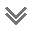

In [37]:
print(web_content.content)

In [29]:
soup = BeautifulSoup(web_content.content , 'html.parser')
print(soup.prettify()[:5000])

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x

In [30]:
world_data = soup.find("tbody").find_all("tr")
for data in world_data:
    print(data)

<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>131,717,059</td>
<td></td>
<td>1,693,568</td>
<td></td>
<td>127,307,717</td>
<td>+1,127</td>
<td>2,715,774</td>
<td>6,590</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Asia</nobr>
</td>
<td>221,472,146</td>
<td>+202</td>
<td>1,553,315</td>
<td>+1</td>
<td>205,662,764</td>
<td>+219</td>
<td>14,256,067</td>
<td>14,733</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Asia" style="display:none;">Asia</td>
<!-- 1 Case every X -->
<td>
</td>
<!-

In [31]:
complete_data = []
for i in range(8, len(world_data)):
  data = []
  list_data = world_data[i].find_all("td")
  for i in list_data:
    data.append(i.text)
  complete_data.append(data)

complete_data

[['1',
  'USA',
  '111,657,554',
  '',
  '1,217,509                                ',
  '',
  '109,474,317',
  '',
  '965,728',
  '1,435',
  '333,500',
  '3,636',
  '1,186,824,416',
  '3,544,820',
  '334,805,269 ',
  'North America',
  '3',
  '275',
  '0',
  '',
  '',
  '2,884'],
 ['2',
  'India',
  '45,032,096',
  '+199',
  '533,513                                ',
  '+1',
  'N/A',
  'N/A',
  'N/A',
  'N/A',
  '32,014',
  '379',
  '935,879,495',
  '665,334',
  '1,406,631,776 ',
  'Asia',
  '31',
  '2,637',
  '2',
  '0.1',
  '',
  '0.7'],
 ['3',
  'France',
  '40,138,560',
  '',
  '167,642                                ',
  '',
  '39,970,918',
  '',
  '0',
  '',
  '612,013',
  '2,556',
  '271,490,188',
  '4,139,547',
  '65,584,518 ',
  'Europe',
  '2',
  '391',
  '0',
  '',
  '',
  ''],
 ['4',
  'Germany',
  '38,824,874',
  '+237',
  '182,797                                ',
  '+20',
  '38,240,600',
  '',
  '401,477',
  'N/A',
  '462,842',
  '2,179',
  '122,332,384',
  '1,458,359',


In [32]:
mapped_data = list(map(lambda x: x[1:10] + [x[12]] + [x[14]], complete_data))
mapped_data

[['USA',
  '111,657,554',
  '',
  '1,217,509                                ',
  '',
  '109,474,317',
  '',
  '965,728',
  '1,435',
  '1,186,824,416',
  '334,805,269 '],
 ['India',
  '45,032,096',
  '+199',
  '533,513                                ',
  '+1',
  'N/A',
  'N/A',
  'N/A',
  'N/A',
  '935,879,495',
  '1,406,631,776 '],
 ['France',
  '40,138,560',
  '',
  '167,642                                ',
  '',
  '39,970,918',
  '',
  '0',
  '',
  '271,490,188',
  '65,584,518 '],
 ['Germany',
  '38,824,874',
  '+237',
  '182,797                                ',
  '+20',
  '38,240,600',
  '',
  '401,477',
  'N/A',
  '122,332,384',
  '83,883,596 '],
 ['Brazil',
  '38,592,310',
  '',
  '710,427                                ',
  '',
  '36,249,161',
  '',
  '1,632,722',
  'N/A',
  '63,776,166',
  '215,353,593 '],
 ['S. Korea',
  '34,571,873',
  '',
  '35,934                                ',
  '',
  '34,535,939',
  '',
  '0',
  '',
  '15,804,065',
  '51,329,899 '],
 ['Japan',
  '33,8

In [33]:
sample_list = [1, 2]

square_lambda = lambda x: x**2
print(square_lambda)

<function <lambda> at 0x000002020313BD80>


In [34]:
squared_values = map(square_lambda, sample_list)
for item in squared_values:
    print(item)

1
4


In [35]:
column_names = [
    "Names",
    "Total Cases",
    "New Cases",
    "Total Deaths",
    "New Deaths",
    "Total Recovered",
    "New Recovered",
    "Active Cases",
    "Serious Cases",
    "Total tests",
    "Population"
]

In [36]:
df = pd.DataFrame(mapped_data, columns = column_names)
df.to_csv('covid_data.csv', index=False)
df.head

<bound method NDFrame.head of               Names  Total Cases New Cases  \
0               USA  111,657,554             
1             India   45,032,096      +199   
2            France   40,138,560             
3           Germany   38,824,874      +237   
4            Brazil   38,592,310             
..              ...          ...       ...   
226         Tokelau           80             
227    Vatican City           29             
228  Western Sahara           10             
229      MS Zaandam            9             
230           China      503,302             

                                  Total Deaths New Deaths Total Recovered  \
0    1,217,509                                                109,474,317   
1      533,513                                         +1             N/A   
2      167,642                                                 39,970,918   
3      182,797                                        +20      38,240,600   
4      710,427                  